# Case studies

## Gold standard

This dataset contains the 50 most recent articles from [arxiv.org in both the cs.LG and stat.ML categories](https://arxiv.org/list/cs.LG/recent), between the dates 2022-10-24 and 2022-10-25 which had 570 search results. We select articles that belong to cs.LG `or` (cs.LG `and` stat.ML) category. 

"Repository evaluation" is performed on articles that provided links to their code repository and "Paper evaluation" is performed on all 50 articles by parsing the `.tex` files from their corresponding arXiv links. `reproscreener` is evaluated this `gold_standard` dataset and the results are shown below.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from pathlib import Path
import sys
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
from reproscreener.gold_standard import summary_table, tex_map_dict, repo_map_dict, prepare_pivot, run_evaluation_repo, run_evaluation_tex

sys.path.append(str(Path.cwd().parent / "src/reproscrener"))

from reproscreener.plots.repo_eval_heatmaps import prepare_repo_heatmap_df, plot_repo_heatmap, plot_repo_clustermap
from reproscreener.plots.tex_eval_heatmaps import prepare_tex_heatmap_df, plot_tex_heatmap
from reproscreener.repo_eval import get_all_repo_eval_dict
from reproscreener.tex_eval import get_all_tex_eval_dict
from reproscreener.gdrive_downloader import gdrive_get_manual_eval
from reproscreener.utils import reverse_mapping

In [2]:
path_repo = Path("../case-studies/arxiv-corpus/gold_standard/repo")
path_tex = Path("../case-studies/arxiv-corpus/gold_standard/source")
path_manual = Path("../case-studies/arxiv-corpus/manual_eval.csv")

manual_eval = gdrive_get_manual_eval(overwrite=False, manual_path=path_manual)
gold_standard_ids = manual_eval["paper"].unique()

Manual eval file already exists, use the overwrite flag to download

## Repo evaluation

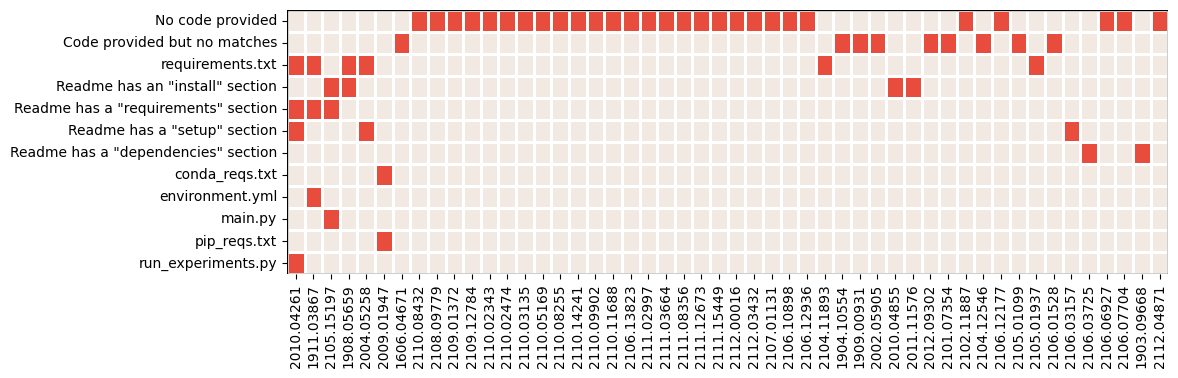

In [3]:
repo_evaluation_dict = get_all_repo_eval_dict(path_repo)
repo_heatmap_df = prepare_repo_heatmap_df(repo_evaluation_dict, gold_standard_ids)
plot_repo_heatmap(repo_heatmap_df, filename="heatmap_repo_eval.png", path_plots=None, sort_x=True, sort_y=True)

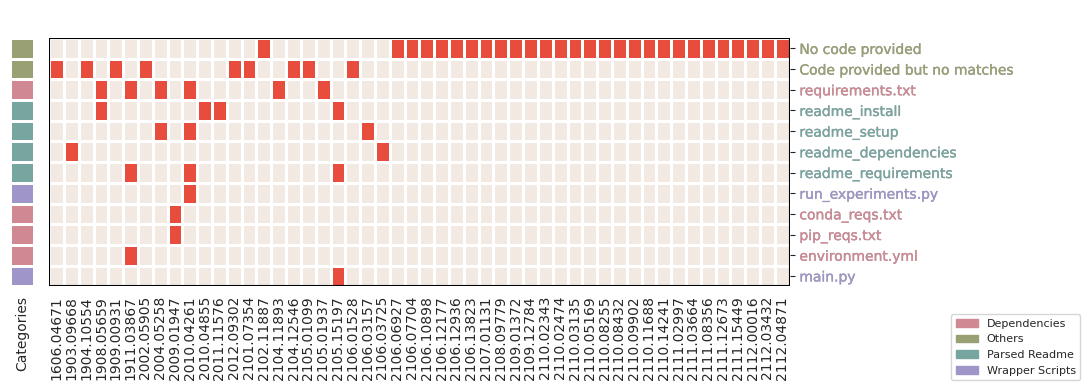

In [4]:
plot_repo_clustermap(repo_heatmap_df, filename="clustermap_repo_eval.png", path_plots=None)

In [5]:
repo_heatmap_df.head(10).drop(columns=["Display_Label"])

,Paper_ID,Matched_File,Category
0,1606.04671,Code provided but no matches,Others
1,1903.09668,readme_dependencies,Parsed Readme
2,1904.10554,Code provided but no matches,Others
3,1908.05659,requirements.txt,Dependencies
4,1908.05659,readme_install,Parsed Readme
5,1909.00931,Code provided but no matches,Others
6,1911.03867,environment.yml,Dependencies
7,1911.03867,requirements.txt,Dependencies
8,1911.03867,readme_requirements,Parsed Readme
9,2002.05905,Code provided but no matches,Others


In [6]:
number_of_papers = len(repo_heatmap_df["Paper_ID"].unique())
print(f"Total number of papers in the gold standard: {len(gold_standard_ids)}")

Total number of papers in the gold standard: 50


In [7]:
summary_table(repo_heatmap_df, "Matched_File", number_of_papers)

,Count,Percentage
No code provided,28,56.00%
Code provided but no matches,9,18.00%
requirements.txt,6,12.00%
readme_install,4,8.00%
readme_requirements,3,6.00%
readme_setup,3,6.00%
readme_dependencies,2,4.00%
environment.yml,1,2.00%
conda_reqs.txt,1,2.00%
pip_reqs.txt,1,2.00%


The variables are grouped by the following categories defined in `reverse_mapping`:

- **Dependencies**: Files related to the dependencies of the repository.
- **Wrapper Scripts**: Files that combine various stages of the workflow.
- **Parsed Readme**: Headers present in the README file of the repository that provide instructions about the code/data.
- **Others**: Contains `No code provided` or `Code provided but no matches`. The latter is used when the code is provided but files from any of the other categories were found in the repository.

In [8]:
reverse_mapping_df = pd.DataFrame.from_dict(reverse_mapping, orient='index', columns=['Category'])
reverse_mapping_df.index.name = 'Matched_File'
reverse_mapping_df

,Category
Matched_File,
requirements.txt,Dependencies
setup.py,Dependencies
environment.yml,Dependencies
pyproject.toml,Dependencies
pip_reqs.txt,Dependencies
conda_reqs.txt,Dependencies
run.py,Wrapper Scripts
run.sh,Wrapper Scripts
main.py,Wrapper Scripts


In [9]:
summary_table(repo_heatmap_df, "Category", number_of_papers)

,Count,Percentage
Others,37,74.00%
Parsed Readme,12,24.00%
Dependencies,9,18.00%
Wrapper Scripts,2,4.00%


In [10]:
no_code_provided_counts = len(repo_heatmap_df[repo_heatmap_df["Matched_File"] == "No code provided"])
code_provided_counts = number_of_papers - no_code_provided_counts
code_provided_percentage = (code_provided_counts / number_of_papers) * 100
print(f"{code_provided_counts}/{number_of_papers} ({code_provided_percentage:.2f}%) of the papers have provided some code")

22/50 (44.00%) of the papers have provided some code


## Tex Evaluation

In [11]:
tex_evaluation_dict = get_all_tex_eval_dict(path_tex)
tex_heatmap_df = prepare_tex_heatmap_df(tex_evaluation_dict, gold_standard_ids)

Output()

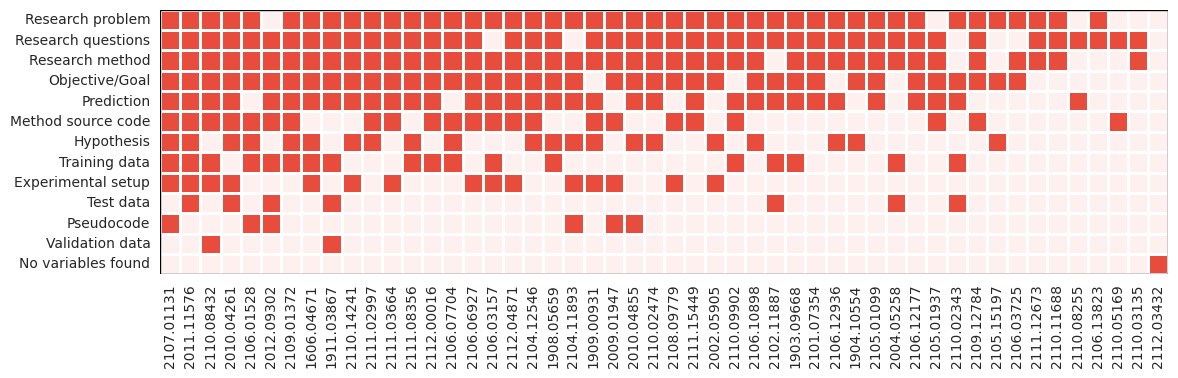

In [12]:
plot_tex_heatmap(tex_heatmap_df, filename="heatmap_tex_eval.png", path_plots=None, sort_x=True, sort_y=True)

In [13]:
tex_heatmap_df.head(10)

,Paper_ID,Found_Variable
0,1606.04671,Prediction
1,1606.04671,Experimental setup
2,1606.04671,Research questions
3,1606.04671,Training data
4,1606.04671,Research method
5,1606.04671,Objective/Goal
6,1606.04671,Hypothesis
7,1606.04671,Research problem
8,1903.09668,Prediction
9,1903.09668,Research questions


In [14]:
summary_table(tex_heatmap_df, "Found_Variable", number_of_papers)

,Count,Percentage
Research questions,44,88.00%
Research problem,44,88.00%
Research method,43,86.00%
Objective/Goal,39,78.00%
Prediction,34,68.00%
Method source code,23,46.00%
Hypothesis,21,42.00%
Training data,18,36.00%
Experimental setup,15,30.00%
Test data,7,14.00%


## Comparision with manual evaluation

### Repo evaluation comparison

In [15]:
repo_heatmap_pivot = prepare_pivot(repo_heatmap_df, 'Paper_ID', repo_map_dict, var_column='Category', match_column='Matched_File')
summary_repo = run_evaluation_repo(repo_heatmap_pivot, repo_map_dict, manual_eval)
# summary_repo.sort_values(by='Found_Articles', ascending=False)
summary_repo

,Category,Found_Articles,Percentage
0,software_dependencies,7,53.846154
0,wrapper_scripts,2,15.384615
0,readme_requirements,3,23.076923
0,readme_dependencies,2,15.384615
0,readme_setup,3,23.076923
0,readme_install,4,30.769231


### Tex evaluation comparison

In [16]:
tex_heatmap_pivot = prepare_pivot(tex_heatmap_df, 'Paper_ID', tex_map_dict, var_column='Found_Variable')
summary_tex = run_evaluation_tex(tex_heatmap_pivot, tex_map_dict, manual_eval)
summary_tex

,Category,Found_Articles,Percentage
0,research_questions,44,89.795918
0,problem,44,89.795918
0,research_method,43,87.755102
0,objective,39,79.591837
0,prediction,34,69.387755
0,code_avail_article,23,46.938776
0,hypothesis,21,42.857143
0,dataset,18,36.734694
0,experiment_setup,15,30.612245
